## Loading the dataset <br> 
In this code, I loaded a dataset containing height and weight information. I performed the following tasks:<br>   
### Check Numeric Values:
Checked if the 'Height(Inches)' column contains numeric values to ensure accurate conversion.
###Conversion to Metric Units:
Converted 'Height(Inches)' to centimeters and stored the result in a new column 'Height(CM)'.
Converted 'Weight(Pounds)' to kilograms and stored the result in a new column 'Weight(KG)'.<br>
### BMI Calculation:
<br>   
Created a new column 'BMI' by calculating the Body Mass Index using the formula: BMI = weight (kg) / (height (m))^2.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the Height and Weight Data
file_path = '/Users/aditya/Desktop/Class/Math661 Apl Stats/Project Employee Attrition/SOCR-HeightWeight.csv'
df = pd.read_csv(file_path)

# Check if 'Height(Inches)' contains numeric values
numeric_check = pd.to_numeric(df['Height(Inches)'], errors='coerce')
if numeric_check.isna().sum() > 0:
    print("The 'Height(Inches)' column contains non-numeric values.")
else:
    # Convert 'Height(Inches)' to centimeters
    df['Height(CM)'] = df['Height(Inches)'] * 2.54

    # Convert 'Weight(Pounds)' to kilograms
    df['Weight(KG)'] = df['Weight(Pounds)'] * 0.453592

    # Create a new column for BMI
    df['BMI'] = df['Weight(KG)'] / ((df['Height(CM)'] / 100) ** 2)


/var/folders/f3/ngl4f6sj0kbdxphth1sf8hfw0000gn/T/ipykernel_24083/1134755341.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
/var/folders/f3/ngl4f6sj0kbdxphth1sf8hfw0000gn/T/ipykernel_24083/1134755341.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
/var/folders/f3/ngl4f6sj0kbdxphth1sf8hfw0000gn/T/ipykernel_24083/1134755341.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({


   Sample Size      Mean  Standard Deviation  Lower CI  Upper CI
0       6250.0  3.009314            0.077844  3.007384  3.011244
1      12500.0  3.008136            0.076642  3.006793  3.009480
2      18750.0  3.008974            0.076635  3.007877  3.010071


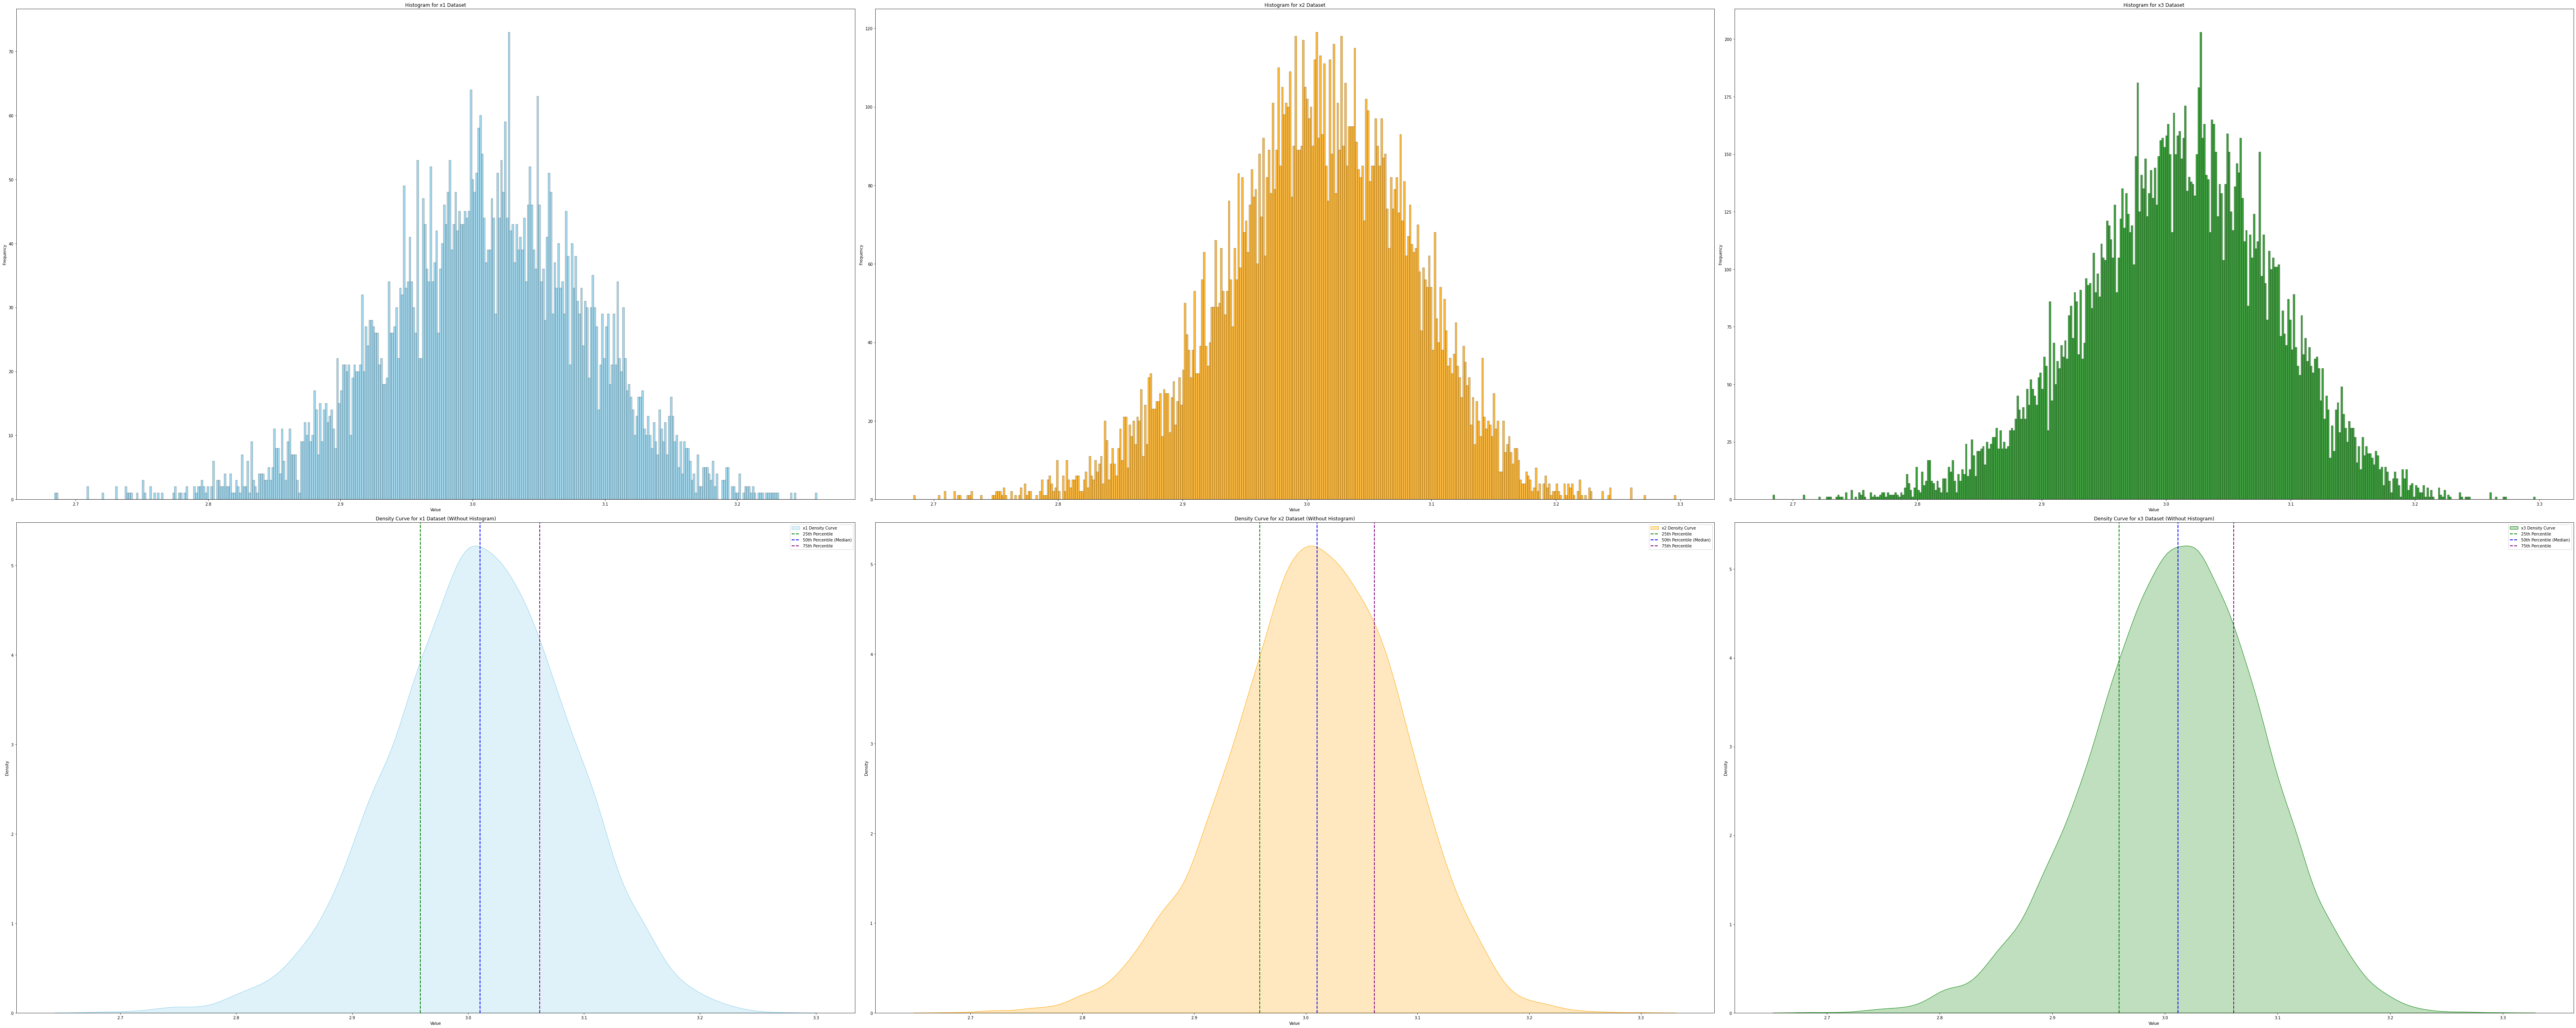

In [5]:
# Define colors for plots
colors = ['skyblue', 'orange', 'green', 'purple', 'pink']

# Specify sample sizes
sample_sizes = [0.25, 0.5, 0.75]

# Initialize a dictionary to store the datasets
datasets = {}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(sample_sizes), figsize=(90, 36), gridspec_kw={'height_ratios': [1, 1]})

# Initialize an empty DataFrame to store statistics
statistics_df = pd.DataFrame(columns=['Sample Size', 'Mean', 'Standard Deviation', 'Lower CI', 'Upper CI'])

# Generate random datasets for each size and plot
for i, size in enumerate(sample_sizes, start=1):
    # Create a variable (xi) for each dataset
    random_indices = np.random.choice(df.index, size=int(size * len(df)), replace=True)
    xi = np.log1p(df.loc[random_indices, 'BMI'].values)  # Apply logarithmic transformation

    # Store the dataset in the dictionary
    datasets[f'x{i}'] = xi

    # Plot histogram
    sns.histplot(xi, kde=False, color=colors[i - 1], bins=400, ax=axes[0, i - 1])
    axes[0, i - 1].set_title(f'Histogram for x{i} Dataset')
    axes[0, i - 1].set_xlabel('Value')
    axes[0, i - 1].set_ylabel('Frequency')

    # Plot density curve without histogram (including quartile ranges)
    sns.kdeplot(xi, color=colors[i - 1], label=f'x{i} Density Curve', fill=True, ax=axes[1, i - 1])

    # Quartile ranges
    quartiles = np.percentile(xi, [25, 50, 75])
    axes[1, i - 1].axvline(quartiles[0], color='green', linestyle='dashed', linewidth=2, label=f'25th Percentile')
    axes[1, i - 1].axvline(quartiles[1], color='blue', linestyle='dashed', linewidth=2, label=f'50th Percentile (Median)')
    axes[1, i - 1].axvline(quartiles[2], color='purple', linestyle='dashed', linewidth=2, label=f'75th Percentile')

    axes[1, i - 1].set_title(f'Density Curve for x{i} Dataset (Without Histogram)')
    axes[1, i - 1].set_xlabel('Value')
    axes[1, i - 1].set_ylabel('Density')
    axes[1, i - 1].legend()

    # Calculate basic statistics and confidence intervals
    xi = datasets[f'x{i}']
    sample_size = len(xi)
    mean_value = np.mean(xi)
    std_deviation = np.std(xi)
    z_value = 1.96  # for a 95% confidence interval
    lower_ci = mean_value - (z_value * (std_deviation / np.sqrt(sample_size)))
    upper_ci = mean_value + (z_value * (std_deviation / np.sqrt(sample_size)))

    # Append statistics to the DataFrame
    statistics_df = statistics_df.append({
        'Sample Size': sample_size,
        'Mean': mean_value,
        'Standard Deviation': std_deviation,
        'Lower CI': lower_ci,
        'Upper CI': upper_ci
    }, ignore_index=True)

# Display the statistics in tabular format
print(statistics_df)

# Adjust layout
plt.tight_layout()
plt.show()


**CREATE Common view**

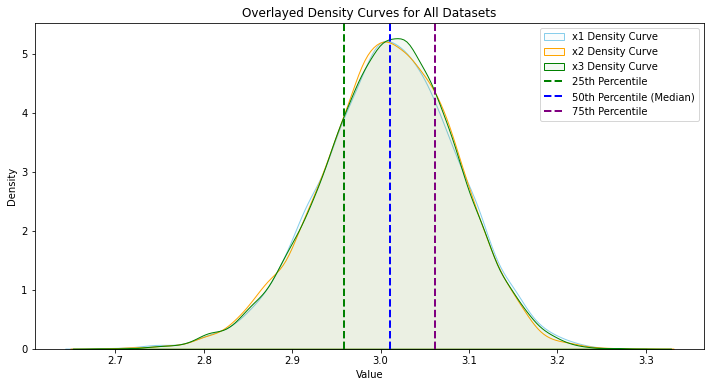

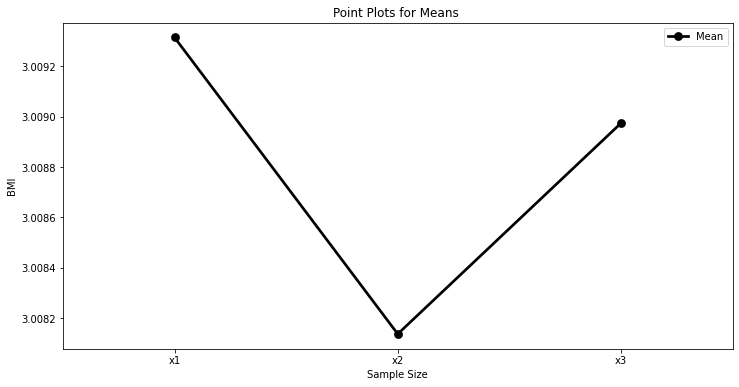

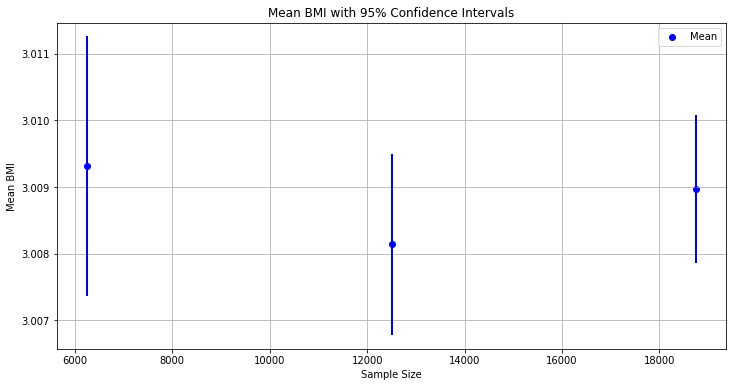

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a list of datasets
datasets_list = [datasets[f'x{i}'] for i in range(1, 4)]

# Define colors for plots
colors = ['skyblue', 'orange', 'green', 'purple', 'pink']

# Initialize a figure for overlaying all datasets
plt.figure(figsize=(12, 6))

# Iterate over each dataset
for i, data in enumerate(datasets_list, start=1):
    # Plot density curve with fill color and changing opacity
    sns.kdeplot(data, color=colors[i-1], label=f'x{i} Density Curve', fill=True, alpha=0.05)

# Quartile ranges
quartiles_combined = np.percentile(np.concatenate(datasets_list), [25, 50, 75])
plt.axvline(quartiles_combined[0], color='green', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(quartiles_combined[1], color='blue', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(quartiles_combined[2], color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')

plt.title('Overlayed Density Curves for All Datasets')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Create point plots for means
plt.figure(figsize=(12, 6))
sns.pointplot(x=[f'x{i}' for i in range(1, 4)], y=[np.mean(datasets[f'x{i}']) for i in range(1, 4)],
              color='black', markers='o', linestyles='-', label='Mean')
#sns.pointplot(x=[f'x{i}' for i in range(1, 4)], y=[np.mean(datasets[f'x{i}']) for i in range(1, 4)],
#             color='red', markers='D', linestyles='', ci='sd', capsize=0.2, label='95% CI')
plt.title('Point Plots for Means ')
plt.xlabel('Sample Size')
plt.ylabel('BMI')
plt.legend()
plt.show()

# Extract Confidence Intervals from the statistics_df
lower_cis = statistics_df['Lower CI'].tolist()
upper_cis = statistics_df['Upper CI'].tolist()

# Create Vertical Errorbar Plot with Mean Line
plt.figure(figsize=(12, 6))

# Plot Mean Points
plt.scatter(statistics_df['Sample Size'], statistics_df['Mean'], color='blue', marker='o', label='Mean')

# Plot 95% Confidence Intervals
for i, size in enumerate(statistics_df['Sample Size']):
    plt.plot([size, size], [lower_cis[i], upper_cis[i]], color='blue', linewidth=2)

# Set Labels and Title
plt.ylabel('Mean BMI')
plt.xlabel('Sample Size')
plt.title('Mean BMI with 95% Confidence Intervals')
plt.grid(True)
plt.legend()

# Show Plot
plt.show()
